In [1]:
import pandas as pd

# Read in Data

In [2]:
data = pd.read_parquet('../data/train.parquet', engine='pyarrow')

In [3]:
data.head()

,NEWS_TITLE,NEWS_ORIGIN_SOURCE,NEWS_ID
17647715,南京化纤：2015年净利润同比增长85倍,中国证券报中证网,18838196
17647716,3月3日A股全天行业资金动向,中国证券报中证网,18865191
17647717,人保健康两款税优健康险产品获批,中国证券报中证网,18865196
17647718,新三板收评：东海证券成交额超2亿元,中国证券报中证网,18865210
17647719,贺禹：大力发展核电 抓紧推进能源供给侧结构性改革,中国证券报中证网,18865211


In [4]:
data.shape

(15340788, 3)

In [5]:
import pyarrow.parquet as pq

In [6]:
pq.ParquetFile('../data/train.parquet').metadata

  created_by: parquet-cpp-arrow version 9.0.0
  num_columns: 4
  num_rows: 15340788
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 3025

In [7]:
len(data.NEWS_ORIGIN_SOURCE.unique())

54817

In [12]:
data_sample = data.sample(n=10000, random_state=1)
data_sample.to_csv("../data/train_sample.csv")

In [13]:
pd.read_csv("../data/train_sample.csv")

,Unnamed: 0,NEWS_TITLE,NEWS_ORIGIN_SOURCE,NEWS_ID
0,39580162,上证50ETF期权：建议继续保持现有现货头寸，期权暂不操作,NaN,17460390
1,37691618,10月15日上海银行间同业拆放利率,NaN,15295190
2,34364484,凯石全球：澳元降息暗示宽松尾声 美指下行加剧,NaN,11367204
3,38150902,听取市政府党组前三季度工作情况汇报,NaN,15812074
4,35415373,宋清辉：2025，中国民营将成主角,NaN,12703985
...,...,...,...,...
9995,45080470,林心如吸金有术，十八年间「还珠三美」商业版图惊人,NaN,24136409
9996,37002622,中信证券总经理等人被公安机关依法调查,NaN,14545126
9997,40371248,台南地震遇难人数上升至41人 重型机具多点救援,NaN,18357276
9998,39472980,跨年晚会家家强？,NaN,17340936


In [22]:
from collections import Counter
sources = filter(lambda x: x is not None, list(data.NEWS_ORIGIN_SOURCE))
d = Counter(sources)
print("Total number of sources: ", len(d))
n = 10
print(f"Top {n} sources: ")
sorted(d.items(), key=lambda x: -x[1])[:n]

Total number of sources:  54816
Top 10 sources: 


[('中国证券网', 242684),
 ('生意社', 224842),
 ('证券时报', 133789),
 ('中国新闻网', 131987),
 ('证券时报网', 110530),
 ('中国证券报', 107858),
 ('新华网', 102881),
 ('上海证券报', 96816),
 ('全景网', 93410),
 ('证券日报', 84297)]

# Data Preprocessing

去除指定符号（空格，标点）；
（jieba）分词；
去除 stopwords；

In [7]:
data = data.sample(n=100000, random_state=1)

## 2. Preprocessing data
1. 去标点符号
2. 分词
3. 移除stopwords

In [8]:
import re
punc = ''' "()\[\]\{\}！？｡。＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.'''

def puncRemover(s):
    return re.sub(r'[%s]'%punc, "", s)

line = "测试。。去 除标点。。，、！"
# print(re.sub(r'[%s]'%punc, "", line))
print(puncRemover(line))

测试去除标点


In [9]:
news_title = data.NEWS_TITLE
news_title = news_title.apply(puncRemover)

In [10]:
news_title

39580162    上证50ETF期权建议继续保持现有现货头寸期权暂不操作
37691618              10月15日上海银行间同业拆放利率
34364484           凯石全球澳元降息暗示宽松尾声美指下行加剧
38150902              听取市政府党组前三季度工作情况汇报
35415373                宋清辉2025中国民营将成主角
                       ...             
37271152                  关注造口人挽救生命唤起希望
35848452             广东省人民代表大会常务委员会任免名单
32859478                    新希望的互联网牛奶实验
37048101                我市新能源公交的士达4000辆
34240779           智慧能源借道中国电建集团涉足一带一路业务
Name: NEWS_TITLE, Length: 100000, dtype: object

In [11]:
import jieba

In [12]:
news_title = news_title.apply(lambda x: list(jieba.cut(x)))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/x7/bnm7sy4j0bj1fs53ln11sg_80000gn/T/jieba.cache
Loading model cost 0.526 seconds.
Prefix dict has been built successfully.


In [13]:
news_title

39580162    [上证, 50ETF, 期权, 建议, 继续, 保持, 现有, 现货, 头寸, 期权, 暂,...
37691618                  [10, 月, 15, 日, 上海银行, 间, 同业, 拆放, 利率]
34364484             [凯石, 全球, 澳元, 降息, 暗示, 宽松, 尾声, 美指, 下行, 加剧]
38150902                      [听取, 市政府, 党组, 前, 三季度, 工作, 情况汇报]
35415373                          [宋清辉, 2025, 中国, 民营, 将成, 主角]
                                  ...                        
37271152                          [关注, 造口, 人, 挽救, 生命, 唤起, 希望]
35848452                           [广东省, 人民代表大会常务委员会, 任免, 名单]
32859478                              [新, 希望, 的, 互联网, 牛奶, 实验]
37048101                        [我市, 新能源, 公交, 的士, 达, 4000, 辆]
34240779           [智慧, 能源, 借, 道, 中国, 电建, 集团, 涉足, 一带, 一路, 业务]
Name: NEWS_TITLE, Length: 100000, dtype: object

In [14]:
list(jieba.cut(data.NEWS_TITLE.iloc[0]))

['上证',
 '50ETF',
 '期权',
 '：',
 '建议',
 '继续',
 '保持',
 '现有',
 '现货',
 '头寸',
 '，',
 '期权',
 '暂',
 '不',
 '操作']

In [15]:
cn_stopwords = pd.read_csv('../data/cn_stopwords.txt', header=None)

cn_stopwords = set(cn_stopwords.iloc[:,0])

In [16]:
"在" in cn_stopwords

True

In [17]:
news_title = news_title.apply(lambda x: [i for i in x if i not in cn_stopwords])

In [18]:
news_title

39580162    [上证, 50ETF, 期权, 建议, 继续, 保持, 现有, 现货, 头寸, 期权, 暂,...
37691618                  [10, 月, 15, 日, 上海银行, 间, 同业, 拆放, 利率]
34364484             [凯石, 全球, 澳元, 降息, 暗示, 宽松, 尾声, 美指, 下行, 加剧]
38150902                      [听取, 市政府, 党组, 前, 三季度, 工作, 情况汇报]
35415373                          [宋清辉, 2025, 中国, 民营, 将成, 主角]
                                  ...                        
37271152                             [关注, 造口, 挽救, 生命, 唤起, 希望]
35848452                           [广东省, 人民代表大会常务委员会, 任免, 名单]
32859478                                 [新, 希望, 互联网, 牛奶, 实验]
37048101                        [我市, 新能源, 公交, 的士, 达, 4000, 辆]
34240779              [智慧, 能源, 道, 中国, 电建, 集团, 涉足, 一带, 一路, 业务]
Name: NEWS_TITLE, Length: 100000, dtype: object

## wordcloud

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [30]:
text = " ".join(news_title.apply(lambda x: " ".join(x)))

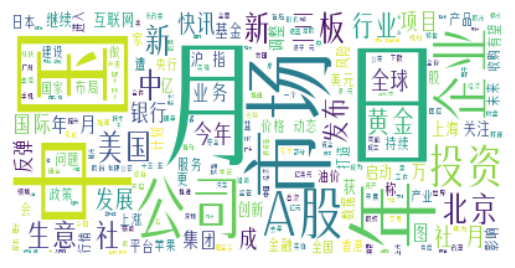

In [34]:
# Generate a word cloud image
stopwords=[]
wordcloud = WordCloud(font_path = "/Users/jin/Downloads/RuiZiChaoPaiYanWeiSongJian-Shan-XiTi/RuiZiChaoPaiYanWeiSongJian-Shan-XiTi(REEJI-SwallowGB-Flash-Thin)-2.ttf", 
                      stopwords = stopwords,
                      background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()